### Importe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

### 2D-Schwamm

In [77]:
# Der z-te Pixel, der gefärbt wird (nur ungerade zahlen)
z = 3
# Fraktalschritte -> Maß für die Feineit des Fraktals
n = 1
# Pixelanzanl einer Seite
pa = z**n #
# Bildarray
arr = np.zeros((pa,pa))


for k in range(1,n+1):
    for i1 in range(0,z**(k-1)):
        # position intervall (lower and upper border)
        I1 = int(pa/(z**k)*(math.ceil(z/2)+ z*i1)-pa/(z**k))
        I2 = int(pa/(z**k)*(math.ceil(z/2)+ z*i1))
        for i2 in range(0,z**(k-1)):
            I3 = int(pa/(z**k)*(math.ceil(z/2)+ z*i2)-pa/(z**k))
            I4 = int(pa/(z**k)*(math.ceil(z/2)+ z*i2))
            arr[I1:I2,I3:I4] = 255

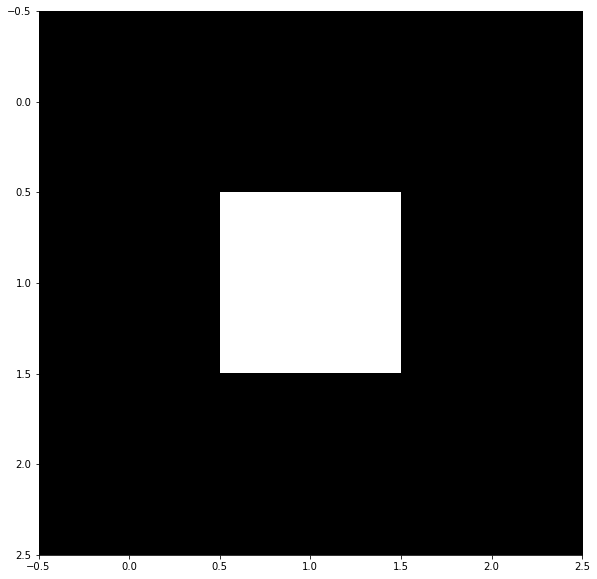

In [78]:
%matplotlib inline
img = Image.fromarray(arr) # convert array (value range [0,1]) into an image with the value range [0,255] 
plt.figure(figsize = (10,10))
plt.imshow(img)

### 3D-Schwamm

In [104]:
# Der z-te Pixel, der gefärbt wird (nur ungerade zahlen)
z = 3
# Fraktalschritte -> Maß für die Feineit des Fraktals
n = 4
# Pixelanzanl einer Seite
pa = z**n #
# Bildarray
arr = np.ones((pa,pa,pa), dtype = bool)


for k in range(1,n+1):
    for i1 in range(0,z**(k-1)):
        # position intervall (lower and upper border)
        I1 = int(pa/(z**k)*(math.ceil(z/2)+ z*i1)-pa/(z**k))
        I2 = int(pa/(z**k)*(math.ceil(z/2)+ z*i1))
        for i2 in range(0,z**(k-1)):
            I3 = int(pa/(z**k)*(math.ceil(z/2)+ z*i2)-pa/(z**k))
            I4 = int(pa/(z**k)*(math.ceil(z/2)+ z*i2))
            # transferring positions according to the axesareas (x,y),(x,z) and (y,z)
            arr[:,I1:I2,I3:I4] = False  # (y,z)
            arr[I1:I2,:,I3:I4] = False  # (x,z)
            arr[I1:I2,I3:I4,:] = False  # (x,z)

In [105]:
# Die Position des Würfelblockes bestimmt seine Farbe. 
def cube_colormap(pa):
    e = np.arange(0,pa)[::-1]/(pa-1)
    # x-plane colormap (Muster der x- Farbkoordinaten)
    x = np.tile(e,(pa,1))
    # x-plane-cube colormap
    x_c = np.tile(x,(pa,1,1))
    # y-plane colormap (Muster der y- Farbkoordinaten)
    y = x.T
    # y-plane-cube colormap
    y_c =  np.tile(y,(pa,1,1))
    # z-plane colormap
    z = np.full((pa,pa),0)
    # z-plane-cube colormap (Muster der z- Farbkoordinaten)
    for i in range(1,pa):
        k = np.full((pa,pa),i/pa)
        z = np.dstack((z,k))
    z_c = z.T
    return x_c,y_c,z_c

In [106]:
# Erstellung des "Farbwürfels"
x,y,z = cube_colormap(pa)
#print(x)
#print(y)
#print(z)

In [107]:
%matplotlib inline
# Combination des Farbwürfels mit dem berechneten Mengerschwamm.
colors = np.zeros((pa,pa,pa) + (3,))
colors[..., 0] = x
colors[..., 1] = y
colors[..., 2] = z

ax = plt.figure(figsize = (10,10)).add_subplot(projection='3d')
ax.voxels(arr, facecolors = colors, edgecolors = np.clip(2.5*colors - 0.5, 0, 1))
ax.set_axis_off()
plt.show()

Using matplotlib backend: Qt5Agg
